<a href="https://colab.research.google.com/github/bharadwaj-2003/-TASK-2-Prediction-Using-Unsupervised-ML-SPARKS-FOUNDATION/blob/main/TASK_2_SPARK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#THE SPARKS FOUNDATION
#Name : BHARADWAJ S

#GRIPNOVEMBER21

Task-2 : Prediction Using Unsupervised ML

Problem: Predict the optimum number of clusters and represent it visually

In [1]:
# Importing all the necessary libraries to work on the dataset
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

In [9]:

# Reading data from csv dataset as a pandas dataframe
iris_data = pd.read_excel('/content/Iris.xlsx')
print("Iris' data imported successfully")

Iris' data imported successfully


In [10]:

iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
# Prints top 5 rows 
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
# Displays a concise summary of the dataframe
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:

# Shows some basic statistical details of a dataframe of numeric values.
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:

# Checking for nulls and duplicates
print(iris_data.isnull().sum(), '\n\nNumber of duplicate rows:' , iris_data.duplicated().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64 

Number of duplicate rows: 3


In [15]:
# Checking for unique classes 
print('Number of unique classes:' , iris_data.Species.nunique())
print(iris_data.Species.value_counts())

Number of unique classes: 3
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64


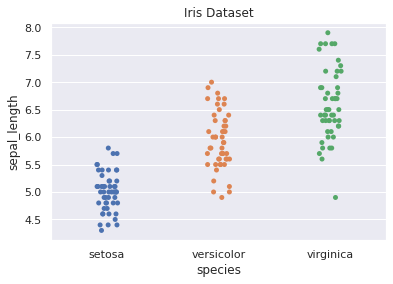

In [16]:
# Using Strip Plot to draw a scatter plot based on the category
sns.set(style = 'darkgrid')
iris = sns.load_dataset('iris');
ax = sns.stripplot(x ='species', y ='sepal_length', data = iris);
plt.title('Iris Dataset')
plt.show()

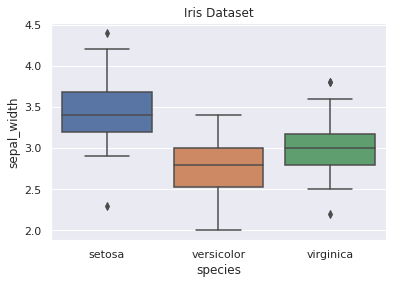

In [17]:
# Using Box Plot to visualize distributions for comparison of data between two groups
sns.boxplot(x='species', y='sepal_width', data=iris)
plt.title("Iris Dataset")
plt.show()

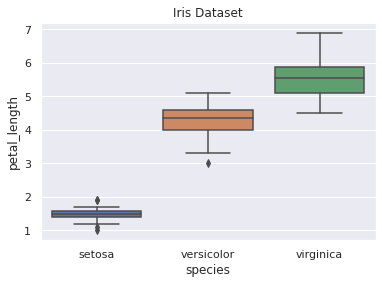

In [18]:
sns.boxplot(x='species', y='petal_length', data=iris)
plt.title("Iris Dataset")
plt.show()

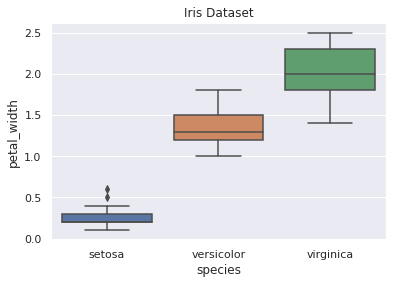

In [19]:
sns.boxplot(x='species', y='petal_width', data=iris)
plt.title("Iris Dataset")
plt.show()

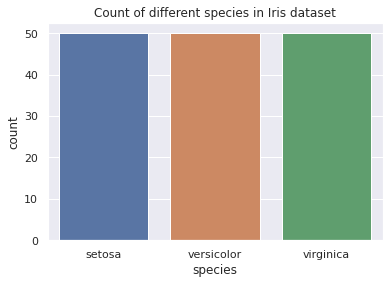

In [20]:

# Using Count Plot to show the counts of observations in each categorical bin using bars.
sns.countplot(x='species', data=iris)
plt.title("Count of different species in Iris dataset")
plt.show()

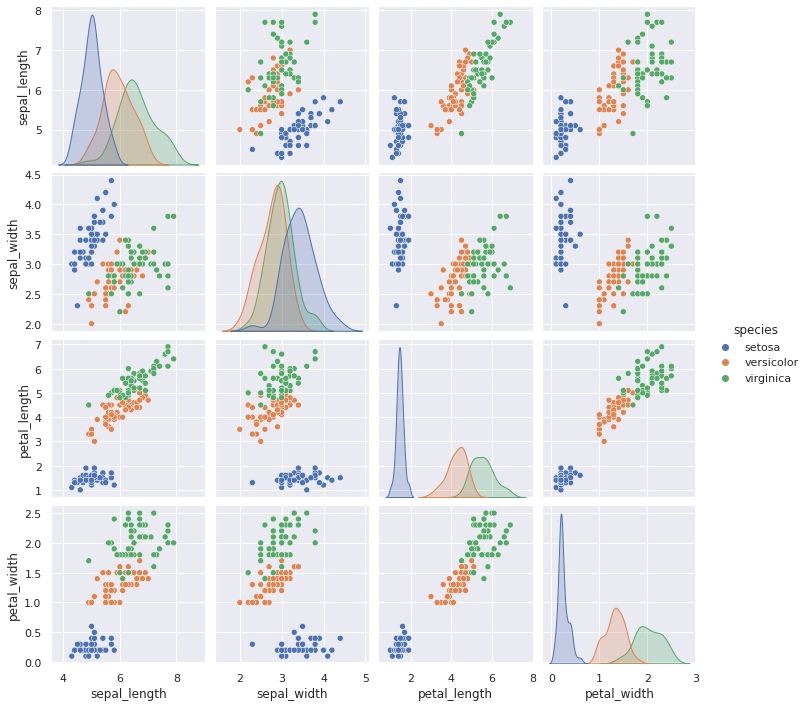

In [21]:

# Using Pair Plot to organize multiple pairwise bivariate distributions 
sns.pairplot(iris, hue='species');

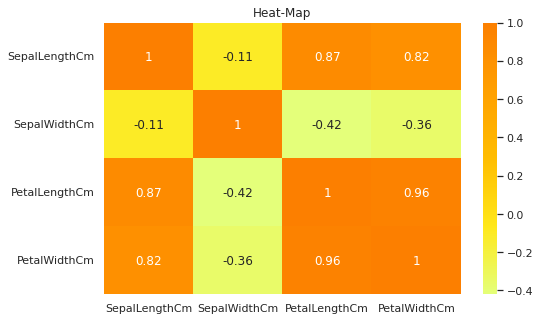

In [22]:
# Using Heat Map to represent various shades of colour for each value to be plotted.
# Darker shades of the chart represent higher values than the lighter shade. 
plt.figure(figsize=(8,5))
sns.heatmap(iris_data.corr(), annot=True, cmap='Wistia')
plt.title("Heat-Map")
plt.show()

In [23]:
# Finding the optimum number of clusters for K-means classification
x = iris_data.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans

# Within-Cluster Sum of Square (WCSS) is the sum of squared distance between each point and the centroid in a cluster
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    
    # Appending the WCSS to the list (kmeans.inertia_ returns the WCSS value for an initialized cluster)
    wcss.append(kmeans.inertia_) 
    print("k=", i, "wcss:", kmeans.inertia_)

k= 1 wcss: 680.8244
k= 2 wcss: 152.36870647733906
k= 3 wcss: 78.94084142614602
k= 4 wcss: 57.345409315718165
k= 5 wcss: 46.53558205128205
k= 6 wcss: 38.93873974358974
k= 7 wcss: 34.19068792479662
k= 8 wcss: 29.905374299825105
k= 9 wcss: 27.927882157034972
k= 10 wcss: 25.95549708624709


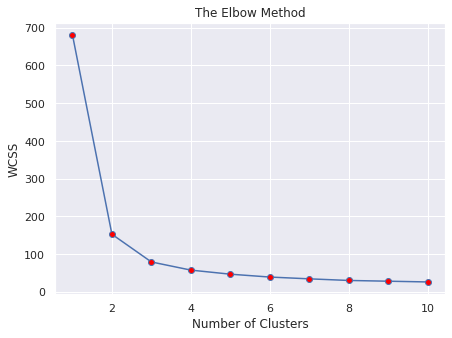

In [24]:
# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.figure(figsize=(7,5))
plt.plot(range(1,11), wcss, marker='o', markerfacecolor='red')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
# Applying kmeans to the dataset / Creating the kmeans classifier  
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

# Returns a label for each data point based on the number of clusters
y_kmeans = kmeans.fit_predict(x)

In [26]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

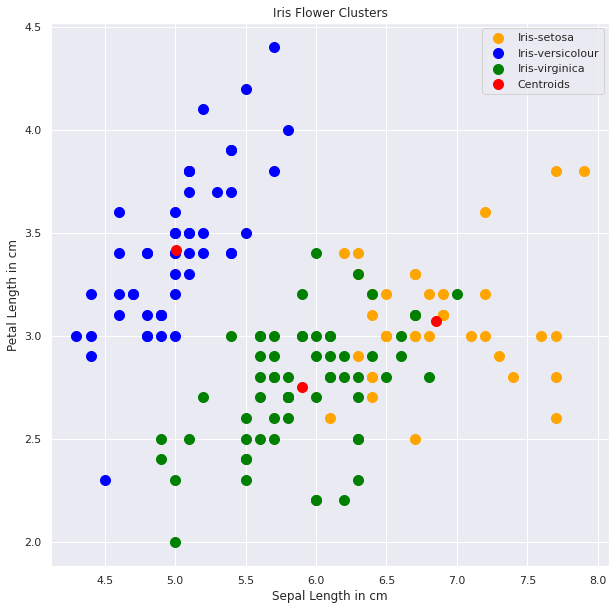

In [27]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.legend()
plt.show()